In [ ]:
%tensorflow_version 2.x
#!pip install tf-nightly-gpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [ ]:
#from google.colab import drive
#!fusermount -u drive
#!google-drive-ocamlfuse drive
#drive.mount('/content/gdrive', force_remount=True)

#https://drive.google.com/file/d/1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0/view?usp=sharing
#FILEID = 1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0" -O FILENAME && rm -rf /tmp/cookies.txt




--2021-11-10 15:02:49--  https://docs.google.com/uc?export=download&confirm=QZNC&id=1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0
Resolving docs.google.com (docs.google.com)... 108.177.119.101, 108.177.119.139, 108.177.119.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-5c-docs.googleusercontent.com/docs/securesc/o27o2hnbjsjtsbu56ac2ud5cn17vhsdi/eav10qttat0bq561ufutushvk73e7cig/1636556550000/11453055216849952163/18217149888270490769Z/1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0?e=download [following]
--2021-11-10 15:02:49--  https://doc-00-5c-docs.googleusercontent.com/docs/securesc/o27o2hnbjsjtsbu56ac2ud5cn17vhsdi/eav10qttat0bq561ufutushvk73e7cig/1636556550000/11453055216849952163/18217149888270490769Z/1nHRngo1Scrp0OJq1IeVRWtAk6EYrDVZ0?e=download
Resolving doc-00-5c-docs.googleusercontent.com (doc-00-5c-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Conne

In [ ]:
!unzip /content/FILENAME

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-027.png  
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-028.png  
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-029.png  
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-030.png  
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-031.png  
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/40X/SOB_M_DC-14-12312-40-032.png  
  inflating: BreaKHis_v1/BreaKHis_v1/histology_slides/breast/mali

In [ ]:
import os
import numpy as np
import pandas as pd

#!pip install "Keras==2.3.1"
#!pip install "apache-airflow[celery,devel,postgres,redis,s3,ssh]==1.10.9"
#!pip install "keras-models==0.0.7"
#!pip install "tensorflow_cpu>=2.1.0"

import tensorflow as tf
#!pip install tensorflow_hub
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Model
!pip install tensorflow_addons
import tensorflow_addons as tfa

from tensorflow.keras.models import load_model

from sklearn.metrics import *
!pip install scikit-plot
import scikitplot as skplt

from functools import partial
import albumentations as A
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE
data = pd.read_csv('/content/Folds.csv')
#img_dir = './data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'
img_dir = '/content/BreaKHis_v1/'
class_names = ['benign', 'malignant']

In [ ]:
model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/1",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/1",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/1",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/1",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/1",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/1",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/1",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/1",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/1",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/1",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/1",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/1",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [ ]:
data = data.rename(columns={'filename':'path'})
data = data.loc[data['mag'] == 400]
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)

fold  mag    grp  ...   label label_int                        filename
91     1  400  train  ...  benign         0  SOB_B_A-14-22549AB-400-001.png
92     1  400  train  ...  benign         0  SOB_B_A-14-22549AB-400-002.png
93     1  400  train  ...  benign         0  SOB_B_A-14-22549AB-400-003.png

[3 rows x 7 columns]

Count of Benign    :  2940
Count of Malignant :  6160


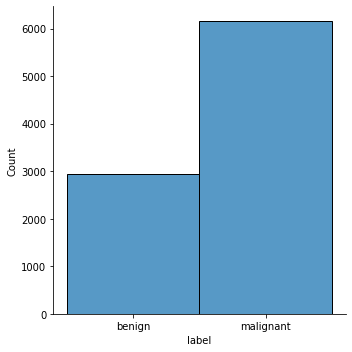

In [ ]:
ax = sns.displot(data=data, x='label')
print('Count of Benign    : ', data[data.label == 'benign'].label.count())
print('Count of Malignant : ', data[data.label == 'malignant'].label.count())

In [ ]:
# remove 600 from dataset for testing

#!pip install --upgrade pandas
#!pip install albumentations

test_df = data.groupby('label', group_keys=False).sample(n=300)
train_df = data.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# split training and validation set
valid_df = train_df.sample(frac=0.2)
train_df = train_df.drop(valid_df.index).reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'
valid_df['set'] = 'valid'
data_new = pd.concat([train_df,valid_df, test_df])

#for col in data_new.columns:
#    print(col)
#print(len(data_new.columns))
#data_new = data_new.drop(['set'], 1, inplace = True)

print(len(data_new['label']))

#ax = sns.displot(data=data_new, x='label', col = 'set)

print('Training set')
print(train_df.label.value_counts())

print('\nValidation set')
print(valid_df.label.value_counts())

print('\nTest set')
print(test_df.label.value_counts())

9100
Training set
malignant    4693
benign       2107
Name: label, dtype: int64

Validation set
malignant    1167
benign        533
Name: label, dtype: int64

Test set
malignant    300
benign       300
Name: label, dtype: int64


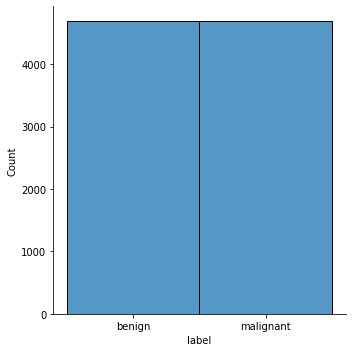

In [ ]:
# upsampling training dataset
max_count = np.max(train_df.label.value_counts())
min_count = np.min(train_df.label.value_counts())
train_df = train_df.groupby('label').sample(n=max_count, replace=True)
train_df = train_df.reset_index(drop=True)
train_df.label.value_counts()

ax = sns.displot(data=train_df, x='label')

In [ ]:
# Define helpers

def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return img, label

def aug_fn(image): 
    transforms = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(p=0.5, limit=15),
        #A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.1, 0.1), brightness_by_max=True),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.1, 0.1)),
        A.RandomResizedCrop(p=0.8, height=IMAGE_SIZE, width=IMAGE_SIZE, scale=(0.9, 1.1), ratio=(0.05, 1.1), interpolation=0),
        A.Blur(p=0.3, blur_limit=(1, 1)),
    ])
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img, tf.float32)
    aug_img = tf.image.resize(aug_img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return aug_img

def augmentor(image, label):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image], Tout=tf.float32)
    return aug_img, label

def view_image(ds, col=8, row=2, size=(25,7)):
    plt.figure(figsize=size)
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for images, labels in ds.take(1):
        for i in range(col*row):
            ax = plt.subplot(row, col, i + 1)
            shape = str(images[i].numpy().shape)
            plt.imshow(images[i].numpy())
            plt.title(class_names[labels[i].numpy()])
            plt.axis("off") 
    plt.tight_layout
    return None

def training_history(history):
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(history['loss']))

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
    return None

def decode_test(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224, 224])/255
    return img

def build_network(image_size):
    print('building model...')
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(image_size, image_size, 3)),
        hub.KerasLayer(model_handle, trainable=True, name='base_model'),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid', name='classifier') 
    ],name=model_name)
    model.build((None, image_size, image_size, 3))
    model.summary()
    print('model loaded!!!')
    return model

def view_prediction():
    plt.figure(figsize=(25,8))
    plt.rcParams.update({'font.size': 8})
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for i in range(30):
        ax = plt.subplot(3, 10, i + 1)
        shape = str(test_img[i].numpy().shape)
        plt.imshow(test_img[i].numpy())
        plt.title(pred_label[i][0])
        plt.axis("off") 
        plt.tight_layout
    return None 

def view_wrong_prediction(df):
    plt.figure(figsize=(len(df)*4,8))
    plt.rcParams.update({'font.size': 8})
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for i in range(len(df)):
        img = decode_test(img_dir+df.path.iloc[i])
        ax = plt.subplot(1, len(df), i + 1)
        plt.imshow(img)
        plt.title('wrongly predicted as '+df.prediction.iloc[i])
        plt.axis("off") 
        plt.tight_layout
    return None 

#########################################################

model_name = 'efficientnetv2-b0'
model_handle = model_handle_map.get(model_name)
IMAGE_SIZE = model_image_size_map.get(model_name, 224)
BATCH_SIZE = 64
EPOCHS = 12
SAMPLE_SIZE = len(train_df)

print(f"Selected model: {model_name} : {model_handle}")
print(f"Input size {IMAGE_SIZE}")

Selected model: efficientnetv2-b0 : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2
Input size 224


In [ ]:
# Load dataset
train_loader = tf.data.Dataset.from_tensor_slices((img_dir+train_df.path, train_df.label_int))
valid_loader = tf.data.Dataset.from_tensor_slices((img_dir+valid_df.path, valid_df.label_int))

train_ds = (
    train_loader.shuffle(len(train_df))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(partial(augmentor),num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE) 
)
valid_ds = (
    valid_loader.shuffle(len(valid_df))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(resize_rescale, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
#!pip install torch
#!curl -s https://course.fast.ai/setup/colab | bash

Not connected to a GPU


In [ ]:
# Neural network construction

#!pip install keras
#!pip install q keras==1.2.2
#!pip install --upgrade albumentations
#!pip install jedi==0.17.2
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

tf.keras.backend.clear_session()
model = build_network(IMAGE_SIZE)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
clr_scheduler = tfa.optimizers.CyclicalLearningRate( 
    initial_learning_rate=2e-1,  maximal_learning_rate=7e-3, 
    step_size=3*(SAMPLE_SIZE//BATCH_SIZE),  
    scale_fn=lambda x: 1 / (2.0 ** (x - 1)), 
    scale_mode='cycle'
)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=clr_scheduler) , 
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=METRICS
)

history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks = [checkpoint_cb],
    validation_data=valid_ds,
)
training_history(history.history)

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-dnsh_0ol
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-dnsh_0ol
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
  Created wheel for albumentations: filename=albumentations-1.1.0-py3-none-any.whl size=102176 sha256=de61331d65e9e1d765ff96be04af5b405167aa90a2c3a0a479e4032d9aed2fdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-2g433zp_/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


building model...
Model: "efficientnetv2-b0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_model (KerasLayer)     (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)               

UnknownError: ignored

In [ ]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_ds = tf.data.Dataset.from_tensor_slices(img_dir+test_df.path) 
test_ds = test_ds.map(decode_test,num_parallel_calls=AUTOTUNE).batch(len(test_df))
test_img = next(iter(test_ds))
test_index = test_df.label_int.values
test_label = test_df.label.values

test_pred = model.predict(test_ds)
pred_index = np.round(test_pred).astype('uint8')
pred_label = np.array(class_names)[pred_index]

print(classification_report(test_index, pred_index, target_names=class_names,zero_division=0))
print('f1_score        :', f1_score(test_index, pred_index, average='micro'))
print('accuracy_score  :', accuracy_score(test_index, pred_index))

cm = skplt.metrics.plot_confusion_matrix(test_label, pred_label, figsize=(8, 8), normalize=False)

In [ ]:
prediction_df = pd.DataFrame({'filename':test_df.filename.values,'actual':test_df.label.values, 'prediction': np.squeeze(pred_label),'path':test_df.path.values,})
wrong_df = prediction_df[prediction_df.actual != prediction_df.prediction].reset_index(drop=True)

#view first 30 prediction
view_prediction()

In [ ]:
#view wrong prediction
view_wrong_prediction(wrong_df)